In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import odl
from odl.contrib import tomo

space = odl.uniform_discr([-112,-112,0],[112,112,224], 128, dtype=np.float32)

geo = tomo.elekta_icon_geometry(num_angles=128)

# load data

y_n = np.float32(np.load("noisy_sinogram.npy"))


A = odl.tomo.operators.ray_trafo.RayTransform(space, geo, impl='astra_cuda')

alpha0 = 0.543304938272
eps = 3.70408163265e-05

# Construct gradient
x_grad = odl.discr.diff_ops.Gradient(space)
huber_functional = odl.solvers.functional.default_functionals.Huber(x_grad.range, gamma = eps)

norm_y =  odl.solvers.functional.default_functionals.L2Norm(A.range) 
norm_y2 =  odl.solvers.functional.default_functionals.L2NormSquared(A.range) 

data_fidel = norm_y2.translated(y_n)*A


In [26]:
alphas = [alpha0/10, alpha0*10]

alpha = alphas[0]

var_model = 0.5 * data_fidel + alpha * huber_functional*x_grad

x_arr = np.float32(np.load("x_solved.npy"))
x = space.zero()
x.assign(x_arr)

print("Functional value before: ", var_model(x))

odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 20, learning_rate=0.0004)

print("Functional value after:  ", var_model(x))

odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 40, learning_rate=0.0001)

print("Functional value after:  ", var_model(x))

odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 40, learning_rate=0.00005)

print("Functional value after:  ", var_model(x))

Functional value before:  513777.6553552336
Functional value after:   507798.5455629402
Functional value after:   507139.2702413457
Functional value after:   507135.32057203376


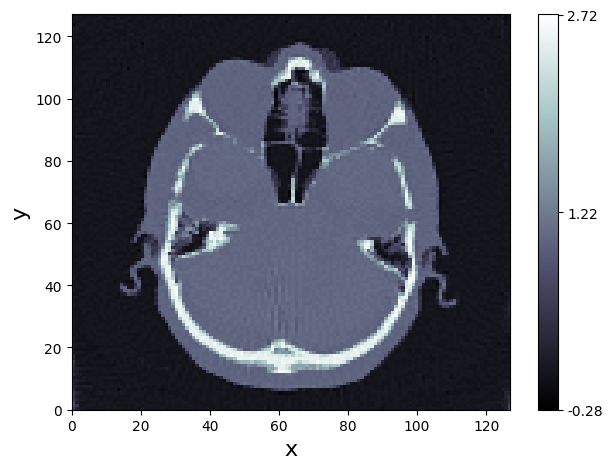

<Figure size 640x480 with 0 Axes>

Relative error in y:  0.0136588670552


In [28]:
x[:,:,30].show()

print("Relative error in y: ", np.sqrt(data_fidel(x))/norm_y(y_n))

In [36]:
alphas = [alpha0/10, alpha0*10]

alpha = alphas[1]

var_model = 0.5 * data_fidel + alpha * huber_functional*x_grad

x_arr = np.float32(np.load("x_solved.npy"))
x = space.zero()
x.assign(x_arr)

print("Functional value before: ", var_model(x))

odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 40, learning_rate=0.01)

print("Functional value after:  ", var_model(x))

odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 40, learning_rate=0.005)

print("Functional value after:  ", var_model(x))

odl.solvers.smooth.gradient.adam(var_model, x, maxiter = 40, learning_rate=0.005)

print("Functional value after:  ", var_model(x))

Functional value before:  3955302.191773361
Functional value after:   3301591.233513403
Functional value after:   3258744.864359056
Functional value after:   3258693.6816943185


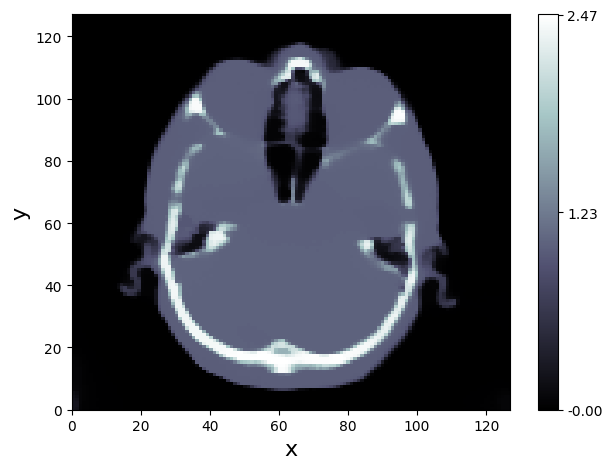

<Figure size 640x480 with 0 Axes>

Relative error in y:  0.0178049213366


In [37]:
x[:,:,30].show()

print("Relative error in y: ", np.sqrt(data_fidel(x))/norm_y(y_n))